# 4.6.3 [실습] 랜덤 포레스트 손글씨 분류

In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 손글씨 데이터 불러오기

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

## 교차 검증

In [3]:
def cross_validation(classifier, features, labels):
    cv_scores = []
    for i in range(10):
        scores = cross_val_score(
            classifier, features, labels, cv=10, scoring="accuracy"
        )
        cv_scores.append(scores.mean())
    return cv_scores

In [4]:
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)

In [5]:
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

## 랜덤 포레스트 vs. 의사결정 트리의 정확도 시각화

<Axes: >

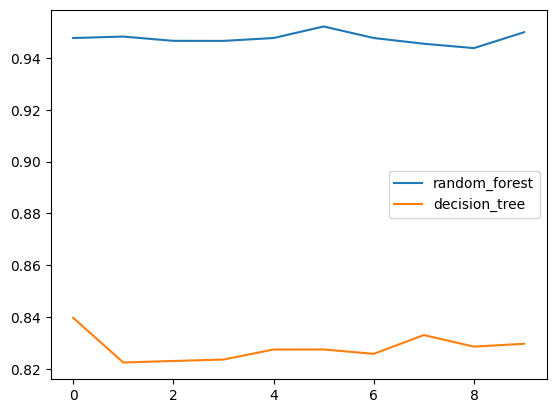

In [8]:
cv_dict = {"random_forest": rf_cv_scores, "decision_tree": dt_cv_scores}

df = pd.DataFrame.from_dict(cv_dict)
df.plot()

## 정확도

In [9]:
np.mean(dt_cv_scores)

0.8280893854748603

In [10]:
np.mean(rf_cv_scores)

0.9475723153320919